In [15]:
%matplotlib nbagg
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
np.set_printoptions(threshold=3)
mpl.rcParams['image.cmap'] = 'jet'
mpl.rcParams['figure.facecolor'] = '0.85'

np.set_printoptions(threshold=3)

<IPython.core.display.Javascript object>


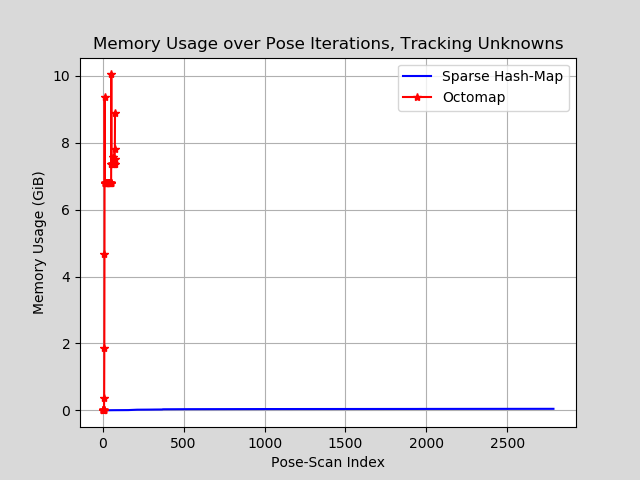

(2785, 2)
(78, 2)


In [51]:
plt.figure()
usage_spp_unk = np.loadtxt("usage_rep_spp_unk.txt", delimiter=",")
print(usage_spp_unk.shape)
plt.plot((usage_spp_unk[:, 1] - usage_spp_unk[0, 1])/ 1e6, color="blue", label="Sparse Hash-Map")
plt.xlabel('Pose-Scan Index')
plt.ylabel('Memory Usage (GiB)')
plt.title('Memory Usage over Pose Iterations, Tracking Unknowns')
usage_octo_unk = np.loadtxt("octoccupancy/usage_rep_octo_unk.txt", delimiter=",")
print(usage_octo_unk.shape)
plt.plot((usage_octo_unk[:, 1] - usage_octo_unk[0, 1]) / 1e6, color="red", marker='*', label="Octomap")
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


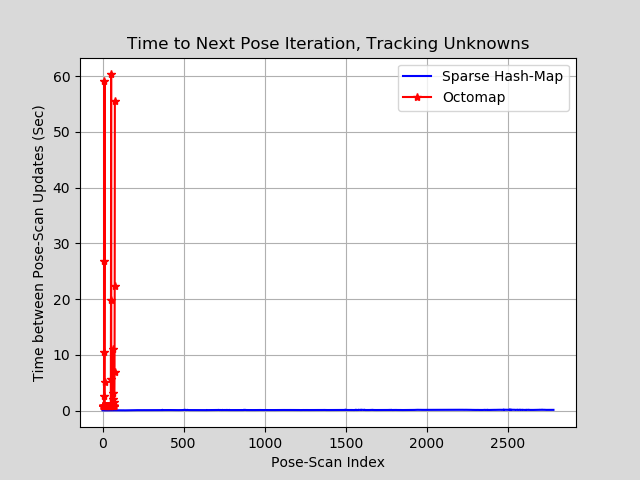

In [52]:
plt.figure()
elap_spp_unk = np.diff(usage_spp_unk[:, 0])
plt.plot(elap_spp_unk, color="blue", label="Sparse Hash-Map")
plt.xlabel('Pose-Scan Index')
plt.ylabel('Time between Pose-Scan Updates (Sec)')
plt.title('Time to Next Pose Iteration, Tracking Unknowns')
elap_octo_unk = np.diff(usage_octo_unk[:, 0])
plt.plot(elap_octo_unk, color="red", marker='*', label="Octomap")
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


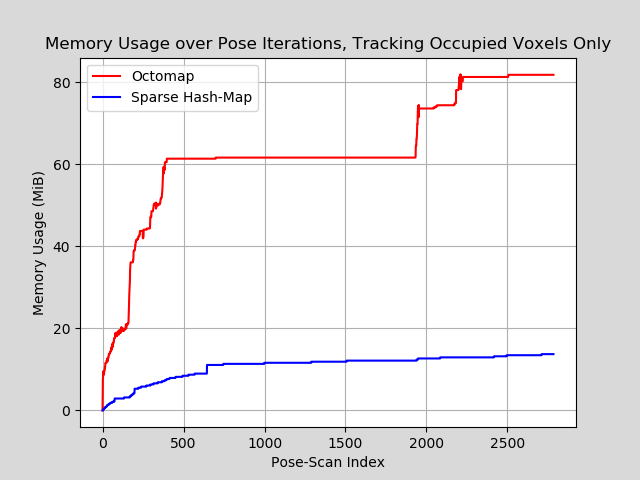

(2785, 2)
(2785, 2)


In [63]:
plt.figure()
usage_octo = np.loadtxt("octoccupancy/usage_rep_octo_occ.txt", delimiter=",")
print(usage_octo.shape)
plt.plot((usage_octo[:, 1] - usage_octo[0, 1]) / 1e3, color="red", label="Octomap")
plt.xlabel('Pose-Scan Index')
plt.ylabel('Memory Usage (MiB)')
plt.title('Memory Usage over Pose Iterations, Tracking Occupied Voxels Only')
usage_spp_occ = np.loadtxt("usage_rep_spp_occ.txt", delimiter=",")
print(usage_spp_occ.shape)
plt.plot((usage_spp_occ[:, 1] - usage_spp_occ[0,1]) / 1e3, color="blue", label="Sparse Hash-Map")
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


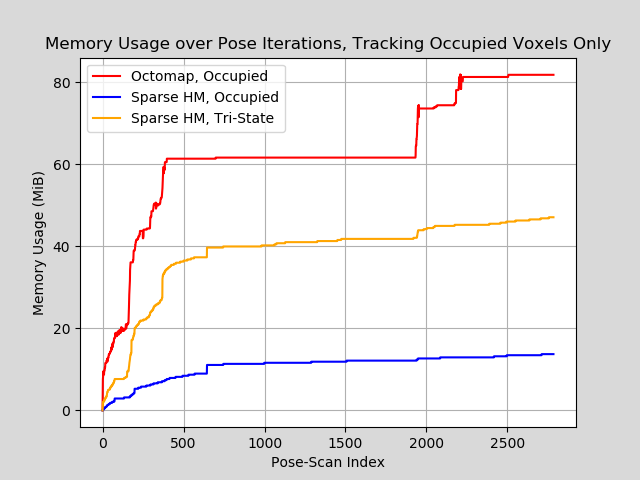

(2785, 2)
(2785, 2)


In [64]:
plt.figure()
usage_octo = np.loadtxt("octoccupancy/usage_rep_octo_occ.txt", delimiter=",")
print(usage_octo.shape)
plt.plot((usage_octo[:, 1] - usage_octo[0, 1]) / 1e3, color="red", label="Octomap, Occupied")
plt.xlabel('Pose-Scan Index')
plt.ylabel('Memory Usage (MiB)')
plt.title('Memory Usage over Pose Iterations, Tracking Occupied Voxels Only')
usage_spp_occ = np.loadtxt("usage_rep_spp_occ.txt", delimiter=",")
print(usage_spp_occ.shape)
plt.plot((usage_spp_occ[:, 1] - usage_spp_occ[0,1]) / 1e3, color="blue", label="Sparse HM, Occupied")
plt.plot((usage_spp_unk[:, 1] - usage_spp_unk[0,1]) / 1e3, color="orange", label="Sparse HM, Tri-State")
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


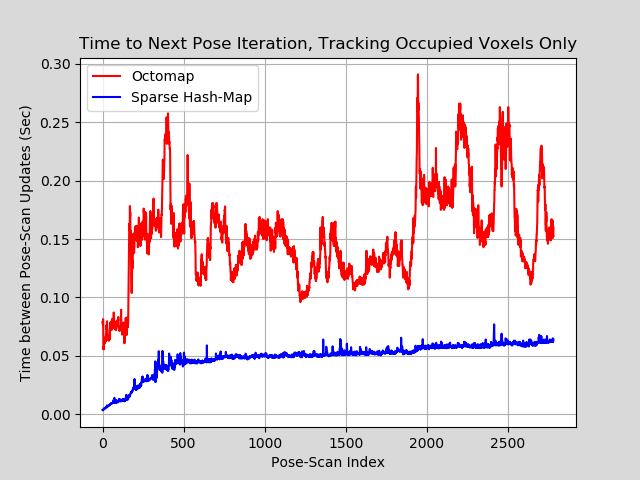

In [65]:
plt.figure()
elap_octo_occ = np.diff(usage_octo[:, 0])
plt.plot(elap_octo_occ, color="red", label="Octomap")
plt.xlabel('Pose-Scan Index')
plt.ylabel('Time between Pose-Scan Updates (Sec)')
plt.title('Time to Next Pose Iteration, Tracking Occupied Voxels Only')
elap_spp_occ = np.diff(usage_spp_occ[:, 0])
plt.plot(elap_spp_occ, color="blue", label="Sparse Hash-Map")
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


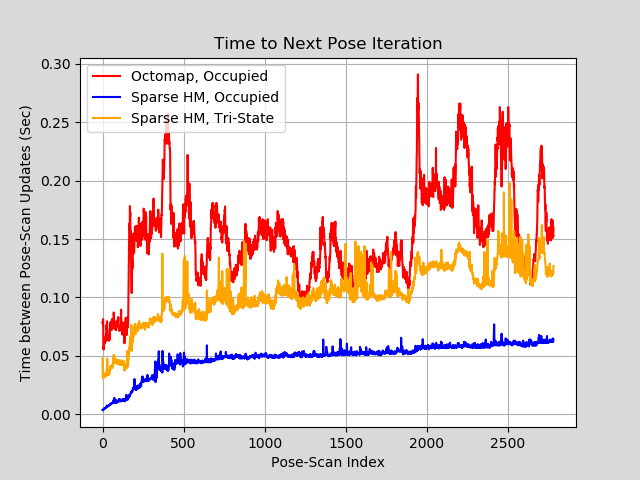

In [66]:
plt.figure()
elap_octo_occ = np.diff(usage_octo[:, 0])
plt.plot(elap_octo_occ, color="red", label="Octomap, Occupied")
plt.xlabel('Pose-Scan Index')
plt.ylabel('Time between Pose-Scan Updates (Sec)')
plt.title('Time to Next Pose Iteration')
elap_spp_occ = np.diff(usage_spp_occ[:, 0])
plt.plot(elap_spp_occ, color="blue", label="Sparse HM, Occupied")
plt.plot(elap_spp_unk, color="orange", label="Sparse HM, Tri-State")
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


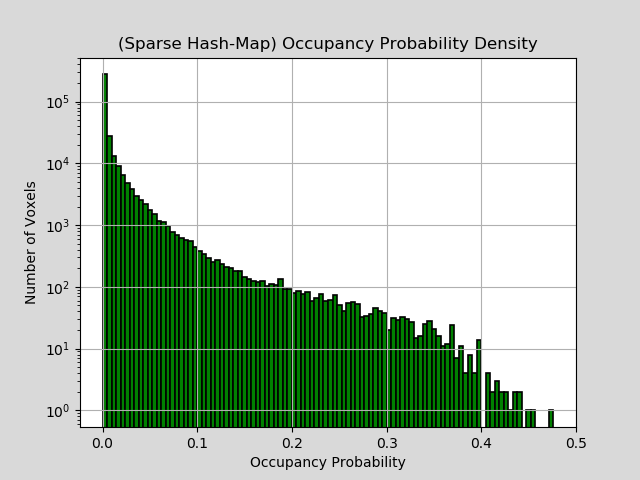

(364160, 5)


In [60]:
plt.figure()
occ = np.loadtxt("occupied_sparsehash_floorbias.txt", delimiter=",")
print(occ.shape)
plt.hist(occ[:, 3], 100, color="green", edgecolor='black', linewidth=1.2)
plt.yscale("log")
plt.xlabel('Occupancy Probability')
plt.ylabel('Number of Voxels')
plt.title('(Sparse Hash-Map) Occupancy Probability Density')
plt.grid()

<IPython.core.display.Javascript object>


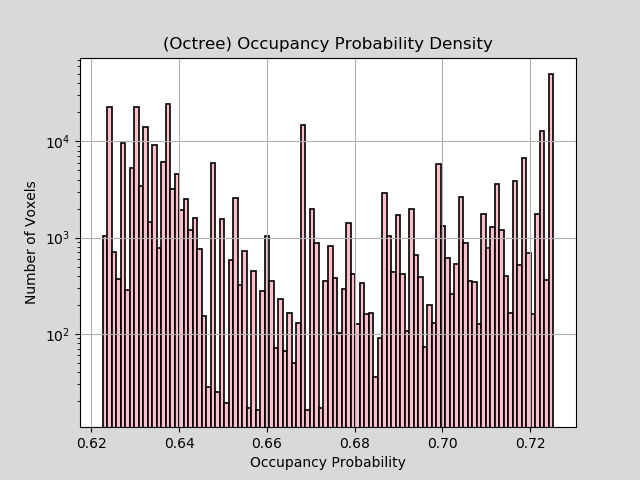

(283598, 5)


In [61]:
plt.figure()
occ_octo = np.loadtxt("octoccupancy/occupied_octomap.txt", delimiter=",")
print(occ_octo.shape)
plt.hist(np.exp(occ_octo[:, 3])/(1+np.exp(occ_octo[:, 3])), 100, color="pink", edgecolor='black', linewidth=1.2)
plt.yscale("log")
plt.xlabel('Occupancy Probability')
plt.ylabel('Number of Voxels')
plt.title('(Octree) Occupancy Probability Density')
plt.grid()

In [62]:
occ_avg = np.mean(occ[:, 3])
occ_max = np.max(occ[:, 3])
print(occ[:, 3].shape)
print(np.asarray(np.where(occ[:, 3] > occ_max * 0.80)).shape)
occ_masked = occ[:, 3][(np.where(occ[:, 3] > occ_max * 0.80))]
print(np.mean(occ_masked))
print(np.mean(np.exp(occ_octo[:, 3])/(1+np.exp(occ_octo[:, 3]))))

(364160,)
(1, 51)
0.4064980588235295
0.668815708664979
